In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

将state space模型中的$w,z$都取为1，constant=0，即得到The Local level model：

$$\begin{array}{c}y_t=\alpha_{t-1}+e_t\\
\alpha_{t}= \alpha_{t-1}+u_t \end{array}$$ 

因此对于concentrated的极大似然函数而言，只需要估计一个参数$q$。例如我们按照上述模型，生成$e \sim N(\mu=0;\sigma_{e}^2=.5)$ 且 $u \sim N(\mu=0;\sigma_{u}^2=.2)$的时间序列：

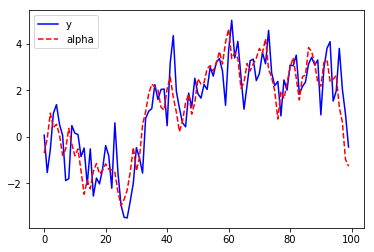

In [2]:
n=100
np.random.seed(153)
su=.2
se=.5
e=np.sqrt(se)*np.random.randn(n)
u=np.sqrt(se)*np.random.randn(n)
y=np.zeros(n)
alpha=np.zeros(n)
y[0]=e[0]
alpha[0]=u[0]
for t in range(1,n):
  y[t]=alpha[t-1]+e[t]
  alpha[t]=alpha[t-1]+u[t]
plt.plot(y,'b',label="y")
plt.plot(alpha,'r--',label="alpha")
plt.legend()
plt.show()  

下面就用concentrated的极大似然函数来估计参数：

In [13]:
a=np.zeros(n)
p=np.zeros(n)
p[0]=10000
k=np.zeros(n)
v=np.zeros(n)
def conML(mypa):
    q=abs(mypa)
    z=1
    w=1
    likelihood=0
    sigmae=0
    for t in range(1,n):
        k[t]=(z*w*p[t-1])/(z**2*p[t-1]+1)
        p[t]=w**2*p[t-1]-w*z*k[t]*p[t-1]+q
        v[t]=y[t]-z*a[t-1]
        a[t]=w*a[t-1]+k[t]*v[t]
        sigmae=sigmae+(v[t]**2/(z**2*p[t-1]+1))
        likelihood=likelihood+.5*np.log(2*np.pi)+.5+.5*np.log(z**2*p[t-1]+1)
    likelihood+=.5*n*np.log(sigmae/n) 
    return likelihood
res=optimize.minimize(conML,[0.2],method="TNC",bounds =[(0,1)])
print("极大似然估计所得结果：",res.x)
trueparam=su/se
print("真实参数：",trueparam)

极大似然估计所得结果： [ 0.17184873]
真实参数： 0.4


下面得出两个方差的估计：

In [15]:
z=1
w=1
sigmae=0
q=res.x[0]
for t in range(1,n):
    k[t]=(z*w*p[t-1])/(z**2*p[t-1]+1)
    p[t]=w**2*p[t-1]-w*z*k[t]*p[t-1]+q
    v[t]=y[t]-z*a[t-1]
    a[t]=w*a[t-1]+k[t]*v[t]
    sigmae=sigmae+(v[t]**2/(z**2*p[t-1]+1))
print("sigmae=",sigmae/(n-1))
print("sigmau=",q*(sigmae/(n-1)))

sigmae= 0.585140985526
sigmau= 0.100555737089


练习：时变的自回归模型


\begin{equation}\label{eq:tvar1}
\begin{array}{c}
y_t=y_{t-1}\beta_{t-1}+e_t\\
\beta_{t}=\beta_{t-1}+u_t
\end{array}
\end{equation}

生成上述序列并用卡尔曼滤波估计

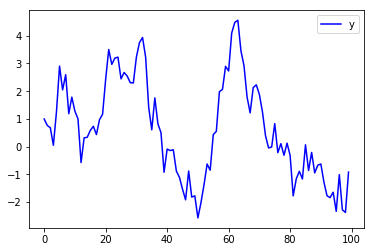

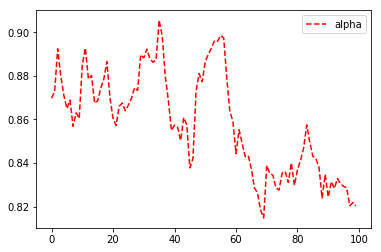

In [26]:
np.random.seed(1221)
trueparam=[.5,.0001]
n=100
e=np.sqrt(trueparam[0])*np.random.randn(n)
u=np.sqrt(trueparam[1])*np.random.randn(n)
y=np.zeros(n)
alpha=np.zeros(n)
y[0]=e[0]
alpha[0]=u[0]+0.87
for t in range(1,n):
    z=y[t-1]
    y[t]=z*alpha[t-1]+e[t]
    alpha[t]=alpha[t-1]+u[t]
plt.plot(y,'b',label="y")
plt.legend()
plt.show()
plt.plot(alpha,'r--',label="alpha")
plt.legend()
plt.show()  

In [27]:
def LikeAR1TV(param):
    sigmae=abs(param[0])
    sigmau=abs(param[1]);
    w=1
    n=len(y)
    a=np.zeros(n)
    p=np.zeros(n)
    const=0
    a[0]=0.83
    p[0]=10000
    k=np.zeros(n)
    v=np.zeros(n)
    likelihood=0
    for t in range(1,n):
        z=y[t-1]
        k[t]=(z*w*p[t-1])/(z**2*p[t-1]+sigmae)
        p[t]=w**2*p[t-1]-w*z*k[t]*p[t-1]+sigmau
        v[t]=y[t]-z*a[t-1]
        a[t]=const+w*a[t-1]+k[t]*v[t]
        likelihood=likelihood+.5*np.log(2*np.pi)+.5*np.log(z**2*p[t-1]+sigmae)+.5*(v[t]**2/(z**2*p[t-1]+sigmae))
    return  likelihood

In [28]:
res=optimize.minimize(LikeAR1TV,[0.3,0.001])
print("极大似然估计所得结果：",res.x)
trueparam=[.5,.0001]
print("真实参数：",trueparam)

极大似然估计所得结果： [  5.74133189e-01  -7.44900632e-09]
真实参数： [0.5, 0.0001]
